<a href="https://colab.research.google.com/github/carlibeisel/Drains_Lower_Boise_River/blob/main/*water_rights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Water Rights in the Treasure Valley

By: Carli Beisel


Created on August 2024


Purpose:

1) Crop Water Rights layer to drainshds in the Treasure Valley and also create a separate file that organizes all WR based on priorty year + surface/groundwater.


2) Create a figure showing the difference between surface + groundwater rights.

3) Create a figure showing change in water rights over time based on priorty date.

## 1. Organize IDWR Water Right Data from GIS Data Hub

Separate based on surface/groundwater rights and organize based on priority year.  

In [1]:
# -------------------- #
#   Import Packages    #
# -------------------- #
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import glob

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# ----------------------------------- #
#         Crop to the LBRB            #
# ----------------------------------- #
water_rights = gpd.read_file('/content/drive/MyDrive/Data/Model Modifications/water_rights/WaterRightPOUs/WaterRightPOUs.shp')
lbrb = gpd.read_file('/content/drive/MyDrive/Data/GIS Shapefiles/LBRB_shp/LBRB_file.shp')

lbrb_water_rights = gpd.overlay(water_rights, lbrb, how='intersection')

lbrb_water_rights.to_file('/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_lbrb_masked/lbrb_water_rights.shp')

<ipython-input-2-8ea92cc00dca>:7: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:8826
Right CRS: EPSG:4326

  lbrb_water_rights = gpd.overlay(water_rights, lbrb, how='intersection')
/usr/local/lib/python3.10/dist-packages/geopandas/io/file.py:610: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


In [ ]:
# ----------------------------------- #
#       Convert .SHP to .CSV          #
# ----------------------------------- #
lbrb_water_rights = gpd.read_file('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights/lbrb_water_rights.shp')

wr = pd.DataFrame(water_rights.drop(columns='geometry'))
wr.to_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv', index=False)


In [6]:
# ----------------------------------- #
#       Crop WR to Drainsheds         #
# ----------------------------------- #

#water_rights = gpd.read_file('/content/drive/MyDrive/Data/Model Modifications/water_rights/WaterRightPOUs/WaterRightPOUs.shp')
water_rights = water_rights.to_crs(drainsheds.crs)
drainsheds = gpd.read_file('/content/drive/MyDrive/Data/Drains_Lower_Boise_River/data_input/drain_delineation/Drains_Merge_07072022.shp')
names = drainsheds['Name']
output_dir = '/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/'

# Create function to crop water rights to each drainshed area
def crop_water_rights_to_drainsheds(water_rights, drainsheds, output_dir):
    mask_gdf = drainsheds
    for i, mask_feature in mask_gdf.iterrows():
        mask_geom = mask_feature['geometry']
        mask_name = mask_feature['Name']

        cropped_gdf = gpd.overlay(water_rights, gpd.GeoDataFrame(geometry=[mask_geom], crs=mask_gdf.crs), how='intersection')

        output_filename = os.path.join(output_dir, f"{mask_name}_wr.shp")

        # Save the cropped shapefile
        cropped_gdf.to_file(output_filename)
        print(f"Cropped shapefile saved to {output_filename}")

crop_water_rights_to_drainsheds(water_rights, drainsheds, output_dir)


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/West Hartley_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Sand Run Gulch_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Eagle Drain_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Mason Drain_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Mason Creek_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/East Hartley Drain_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Willow Creek_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Conway Gulch_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/ThurmanDrain_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/North Middleton_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/South Middleton_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Indian Creek_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Drainage District No. 3_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Fifteen Mile Creek_wr.shp


Cropped shapefile saved to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Dixie drain_wr.shp


In [9]:
# ----------------------------------- #
#   Convert Drain WR to CSV File      #
# ----------------------------------- #

shapefiles = glob.glob('/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/*.shp')

csv_output_dir = '/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/'
for shapefile in shapefiles:
    gdf = gpd.read_file(shapefile)
    base_name = os.path.basename(shapefile)
    drainshed_name = base_name.split('_wr')[0]  # Extracting the part before '_wr'
    gdf['Drainshed'] = drainshed_name #add a column for each drainshed name
    csv_filename = os.path.splitext(base_name)[0] + '.csv'
    csv_filepath = os.path.join(csv_output_dir, csv_filename)
    gdf.to_csv(csv_filepath, index=False)
    print(f"Converted {shapefile} to {csv_filepath} with added 'Drainshed' column.")

Converted /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/West Hartley_wr.shp to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/West Hartley_wr.csv with added 'Drainshed' column.
Converted /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Sand Run Gulch_wr.shp to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Sand Run Gulch_wr.csv with added 'Drainshed' column.
Converted /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/East Hartley Drain_wr.shp to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/East Hartley Drain_wr.csv with added 'Drainshed' column.
Converted /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Eagle Drain_wr.shp to /content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/Eagle Drain_wr.csv with added 'Drainshed' column.
Co

In [20]:
# ----------------------------------------- #
#      Merge drainhed WRs into one file     #
# ----------------------------------------- #

csv_files = glob.glob('/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/*.csv')
df_list = []

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_list.append(df)
merged_df = pd.concat(df_list, ignore_index=True)
merged_df.to_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/drainsheds_wr.csv', index=False)

#add in new column to separate GW from SW
file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/drainsheds_wr.csv')
file['Type'] = file['Source'].apply(lambda x: 'GW' if x == 'GROUND WATER' else 'SW')
file.to_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/drainsheds_wr.csv', index=False)

<ipython-input-20-fa578a6a799e>:9: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
<ipython-input-20-fa578a6a799e>:9: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
<ipython-input-20-fa578a6a799e>:15: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/drainsheds_wr.csv')


In [26]:
file

,WaterRight,BasinNumbe,SequenceNu,SplitSuffi,Status,PriorityDa,DecreedDat,Owner,WaterUse,WaterUseCo,...,PlaceOfUse,WRReport,WRDocs,WRMap,TrustOrNon,SHAPE_STAr,SHAPE_STLe,geometry,Drainshed,Type
0,63-30229,63,30229,NaN,Active,1980-10-24,2000-05-26,LOUIS F PRATT,DOMESTIC,43,...,262,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,NaN,2.015290e+04,600.541287,POLYGON ((-116.67069620651321 43.8061913209887...,Sand Run Gulch,GW
1,63-27688,63,27688,NaN,Active,1940-06-01,2000-05-04,PAUL E BOOHER,DOMESTIC,43,...,391,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,NaN,1.141171e+04,434.217813,POLYGON ((-116.93582990492582 43.7705009523726...,Sand Run Gulch,GW
2,63-20790,63,20790,NaN,Active,1949-08-10,2000-03-24,GOTSCH RANCH INC,DOMESTIC,43,...,2898,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,NaN,6.385427e+03,385.074020,POLYGON ((-116.87147340825109 43.7561409276644...,Sand Run Gulch,GW
3,63-22087,63,22087,NaN,Active,1950-04-10,2000-03-31,LG DAVISON & SONS INC,DOMESTIC,43,...,6573,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,NaN,1.618672e+05,1609.316519,POLYGON ((-116.78276940685716 43.8471204125886...,Sand Run Gulch,GW
4,63-5129,63,5129,NaN,Active,1878-04-01,NaN,PARMA IRRIGATION DISTRICT,IRRIGATION,1,...,6698,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,NaN,2.923566e+06,9673.453900,POLYGON ((-116.94206264909744 43.7742097333181...,Sand Run Gulch,SW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89890,63-34332,63,34332,NaN,Active,2017-01-17,NaN,H & B CRUSHING LLC,AESTHETIC STORAGE,53,...,890639,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,NaN,2.813416e+03,268.772115,POLYGON ((-116.31706915187507 43.5157847053463...,Fifteen Mile Creek,GW
89891,63-35503,63,35503,NaN,Active,1971-03-22,2007-04-02,HIAWATHA TRUST 2015,IRRIGATION,1,...,894728,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,NaN,6.156907e+04,1277.900617,POLYGON ((-116.48344761137699 43.6521781898301...,Fifteen Mile Creek,GW
89892,63-34496,63,34496,NaN,Active,2018-01-25,NaN,JOE M BROWN,IRRIGATION,1,...,900436,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,NaN,3.155300e+03,748.431159,POLYGON ((-116.25521063140536 43.5215068379889...,Fifteen Mile Creek,GW
89893,63-34496,63,34496,NaN,Active,2018-01-25,NaN,JOE M BROWN,DOMESTIC,43,...,900437,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,NaN,1.900913e+04,565.500961,POLYGON ((-116.25465507587175 43.5208160029856...,Fifteen Mile Creek,GW


In [40]:
# ------------------------------ #
#      Drain WRs Model Input     #
# ------------------------------ #

df = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/drainsheds_wr.csv')

# Convert columns to datetime format and extract the year
df['PriorityDa_year'] = pd.to_datetime(df['PriorityDa'], format='%Y-%m-%d').dt.year
df['DecreedDat_year'] = pd.to_datetime(df['DecreedDat'], format='%Y-%m-%d').dt.year

years = pd.DataFrame({'Year': range(1852, 2025)})

# Group by "Drainshed"
grouped = df.groupby('Drainshed')

results = []

for drainshed, group in grouped:
    # Count occurrences of 'PriorityDa_year' for each year
    priority_counts = group['PriorityDa_year'].value_counts().sort_index()
    priority_counts_df = pd.DataFrame(priority_counts).reset_index()
    priority_counts_df.columns = ['Year', 'priority_year']

    # Count occurrences of 'DecreedDat_year' for each year
    decreed_counts = group['DecreedDat_year'].value_counts().sort_index()
    decreed_counts_df = pd.DataFrame(decreed_counts).reset_index()
    decreed_counts_df.columns = ['Year', 'decreed_dat']

    # Merge counts into the years DataFrame
    result_df = years.merge(priority_counts_df, on='Year', how='left').merge(decreed_counts_df, on='Year', how='left')

    # Fill NaN values with 0
    result_df.fillna(0, inplace=True)

    # Convert counts to integers
    result_df['priority_year'] = result_df['priority_year'].astype(int)
    result_df['decreed_dat'] = result_df['decreed_dat'].astype(int)

    # Add the drainshed identifier to the results
    result_df['Drainshed'] = drainshed
    results.append(result_df)

final_df = pd.concat(results, ignore_index=True)

print(final_df)

final_df.to_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/final_wr.csv')

      Year  priority_year  decreed_dat     Drainshed
0     1852              0            0  Conway Gulch
1     1853              0            0  Conway Gulch
2     1854              0            0  Conway Gulch
3     1855              0            0  Conway Gulch
4     1856              0            0  Conway Gulch
...    ...            ...          ...           ...
2590  2020             15            0  Willow Creek
2591  2021              0            0  Willow Creek
2592  2022              0            0  Willow Creek
2593  2023              0            0  Willow Creek
2594  2024              0            0  Willow Creek

[2595 rows x 4 columns]


## 2. Create a figure showing the difference between surface and groundwater rights in the Treasure Valley.

<ipython-input-59-5063505e535c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


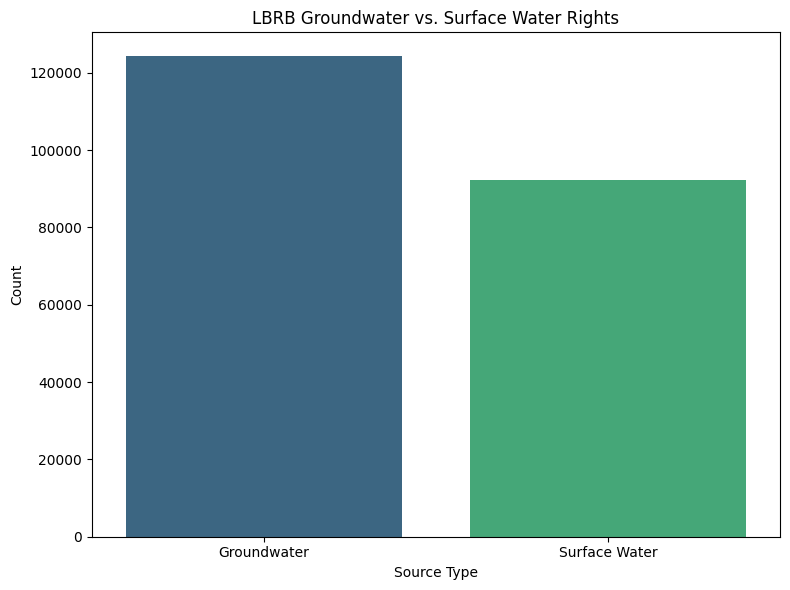

In [ ]:
# ----------------------------------- #
#   Figure for SW/GW in LBRB (bar)    #
# ----------------------------------- #
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')

# Ensure 'Source' column is in the expected format
data['Source'] = data['Source'].astype(str)

groundwater = data[data['Source'] == 'GROUND WATER']
surface_water = data[data['Source'] != 'GROUND WATER']

counts = pd.Series({
    'Groundwater': len(groundwater),
    'Surface Water': len(surface_water)
})

plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis')

plt.title('LBRB Groundwater vs. Surface Water Rights')
plt.xlabel('Source Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


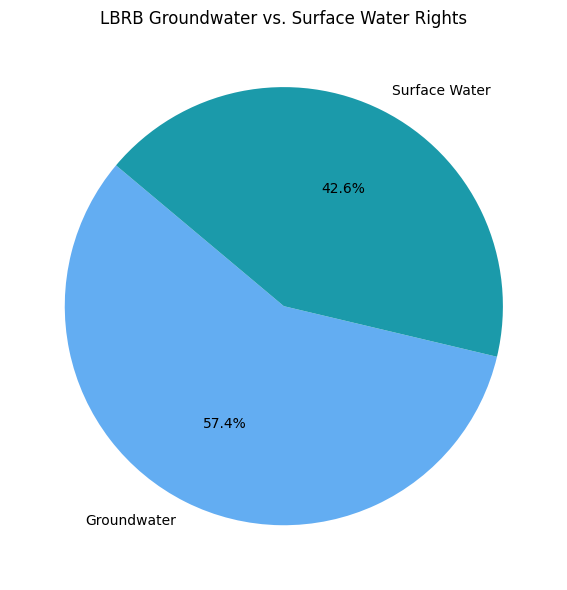

In [ ]:
# ----------------------------------- #
#   Figure for SW/GW in LBRB (pie)    #
# ----------------------------------- #
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')

data['Source'] = data['Source'].astype(str)

groundwater = data[data['Source'] == 'GROUND WATER']
surface_water = data[data['Source'] != 'GROUND WATER']

counts = pd.Series({
    'Groundwater': len(groundwater),
    'Surface Water': len(surface_water)
})

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['#63ADF2', '#1B9AAA'])
plt.title('LBRB Groundwater vs. Surface Water Rights')

plt.tight_layout()
plt.show()

In [ ]:
# ----------------------------------- #
#      SW/GW Comparison in the TV     #
# ----------------------------------- #

#violin plot of all drainages
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data['Source'] = data['Source'].astype(str)
data['PriorityDa'] = pd.to_datetime(data['PriorityDa'], errors='coerce')
data['PriorityYear'] = data['PriorityDa'].dt.year
source = data['Source']
year = data['PriorityYear']
fig, axx = plt.subplots(1, 2, figsize=(14, 6))

# Violin plot
sns.violinplot(x=source, y=year, ax=axx[0], palette='muted')
axx[0].set_title('Distribution of Years by Water Source')
axx[0].set_ylim((min(year), max(year)))  # Adjust based on the range of years in your data

# Box plot
sns.boxplot(x=source, y=year, ax=axx[1], palette='muted')
axx[1].set_title('Box Plot of Years by Water Source')
axx[1].set_ylim((min(year), max(year)))  # Adjust based on the range of years in your data

plt.tight_layout()
plt.show()

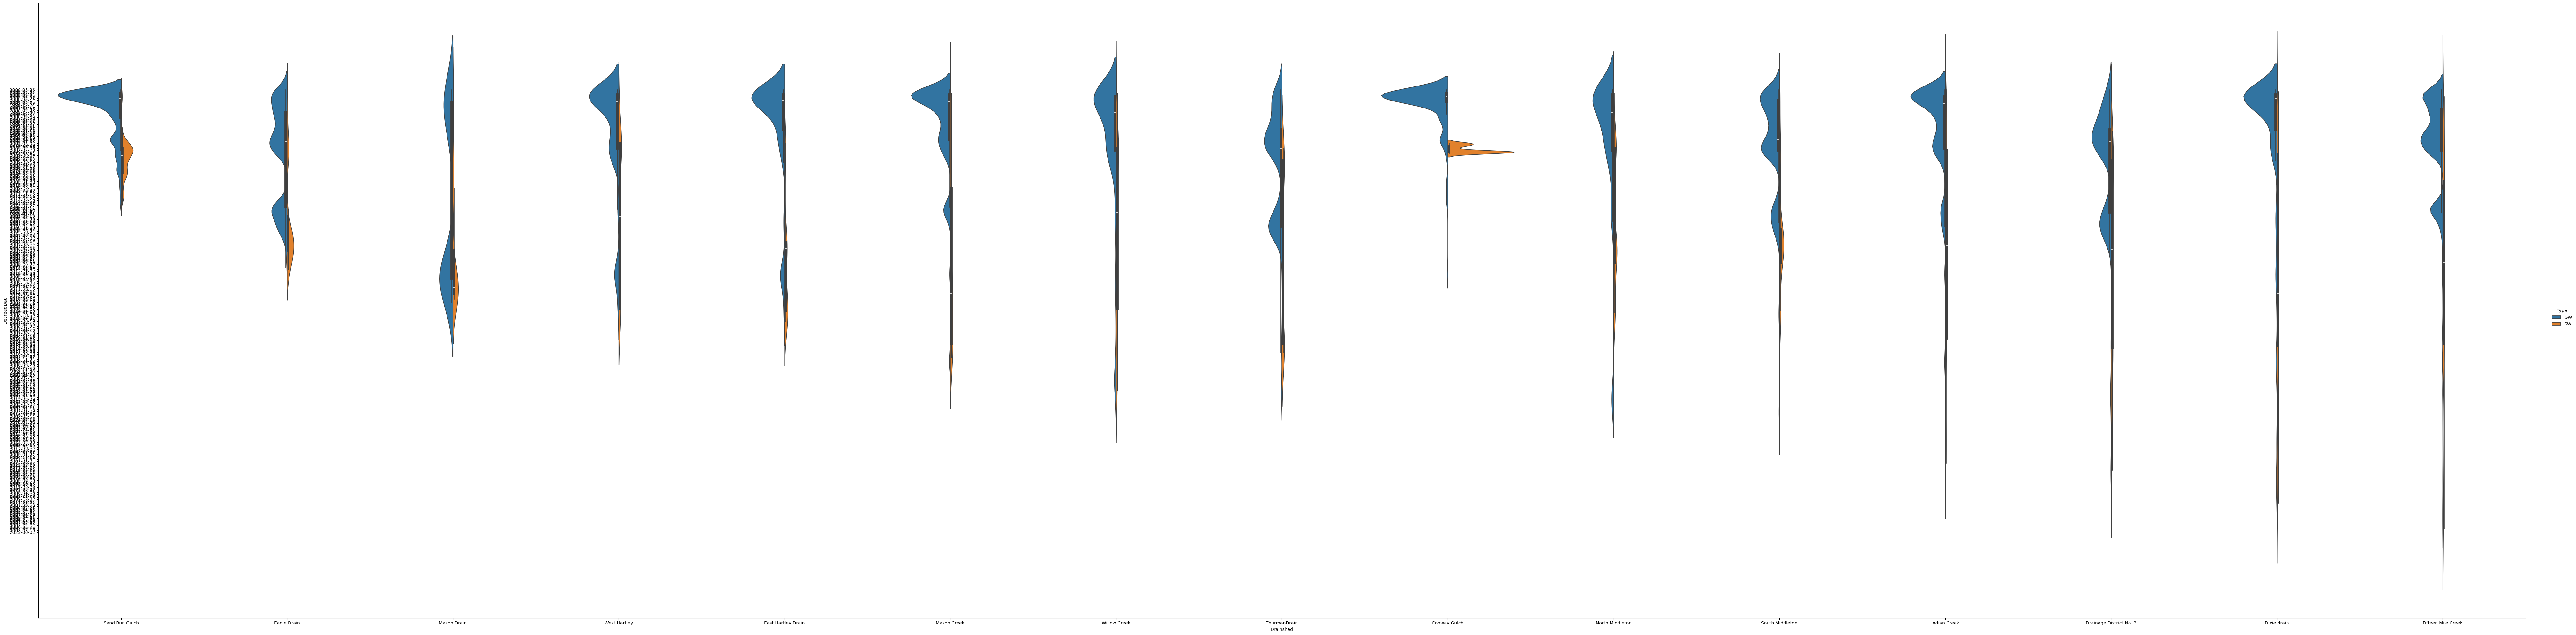

In [29]:
# ----------------------------------- #
#   SW/GW Comparison in Drainsheds    #
# ----------------------------------- #

#violin plot of all drainages

file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/drainsheds_wr.csv')

sns.catplot(
    data=file, x="Drainshed", y="DecreedDat", hue="Type",
    kind="violin", split=True, height=20, aspect=4)  # Increase height and width (aspect ratio)

plt.show()

## 3. Create a figure showing change in water rights over time based on priorty date.

<ipython-input-53-dc834b5a7af6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PriorityYear', data=data, palette='viridis', ax=ax)


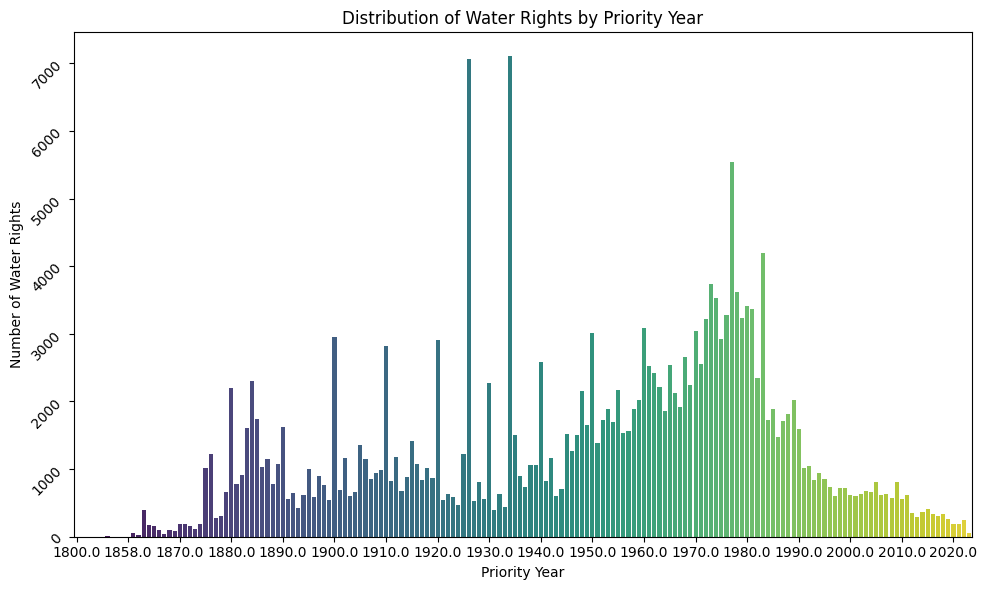

In [ ]:
# ----------------------------------- #
#       Figure for All of TV
#          (priority year)
# ----------------------------------- #
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data['PriorityDa'] = pd.to_datetime(data['PriorityDa'], errors='coerce')
data['PriorityYear'] = data['PriorityDa'].dt.year
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='PriorityYear', data=data, palette='viridis', ax=ax)

# Limit x-axis ticks to a desired number
ax.xaxis.set_major_locator(plt.MaxNLocator(20))  # Adjust the number within MaxNLocator

plt.title('Distribution of Water Rights by Priority Year')
plt.xlabel('Priority Year')
plt.ylabel('Number of Water Rights')
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-7-7a9c545ee946>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DecreedYear', data=data, palette='viridis', ax=ax)


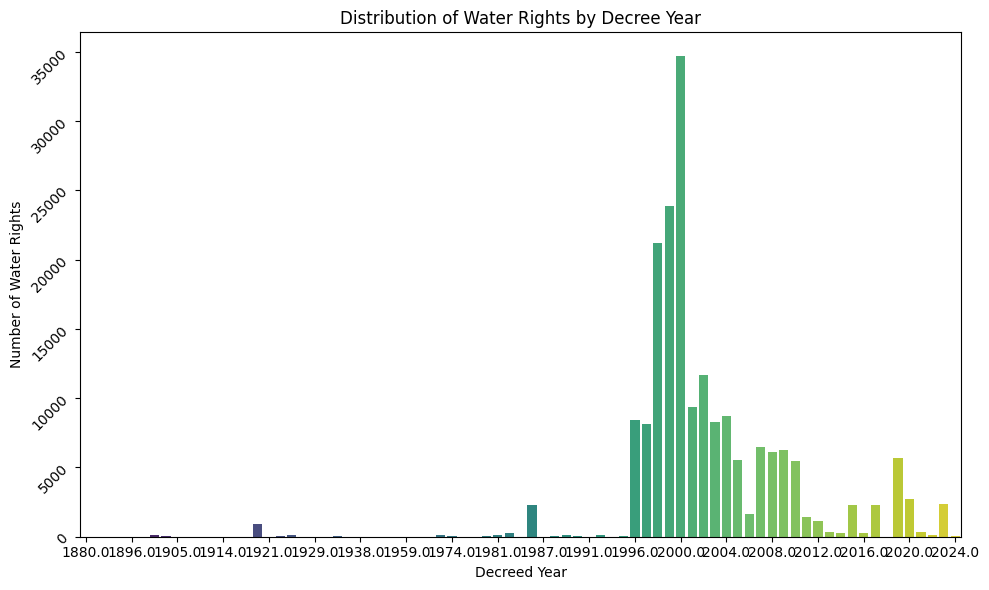

In [7]:
# ----------------------------------- #
#       Figure for All of TV
#          (decreed year)
# ----------------------------------- #
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data['DecreedDat'] = pd.to_datetime(data['DecreedDat'], errors='coerce')
data['DecreedYear'] = data['DecreedDat'].dt.year
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='DecreedYear', data=data, palette='viridis', ax=ax)

# Limit x-axis ticks to a desired number
ax.xaxis.set_major_locator(plt.MaxNLocator(20))  # Adjust the number within MaxNLocator

plt.title('Distribution of Water Rights by Decree Year')
plt.xlabel('Decreed Year')
plt.ylabel('Number of Water Rights')
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-57-a1b5131091d2>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PriorityYear', data=groundwater_data, palette='viridis', ax=axes[0])
<ipython-input-57-a1b5131091d2>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PriorityYear', data=other_data, palette='viridis', ax=axes[1])


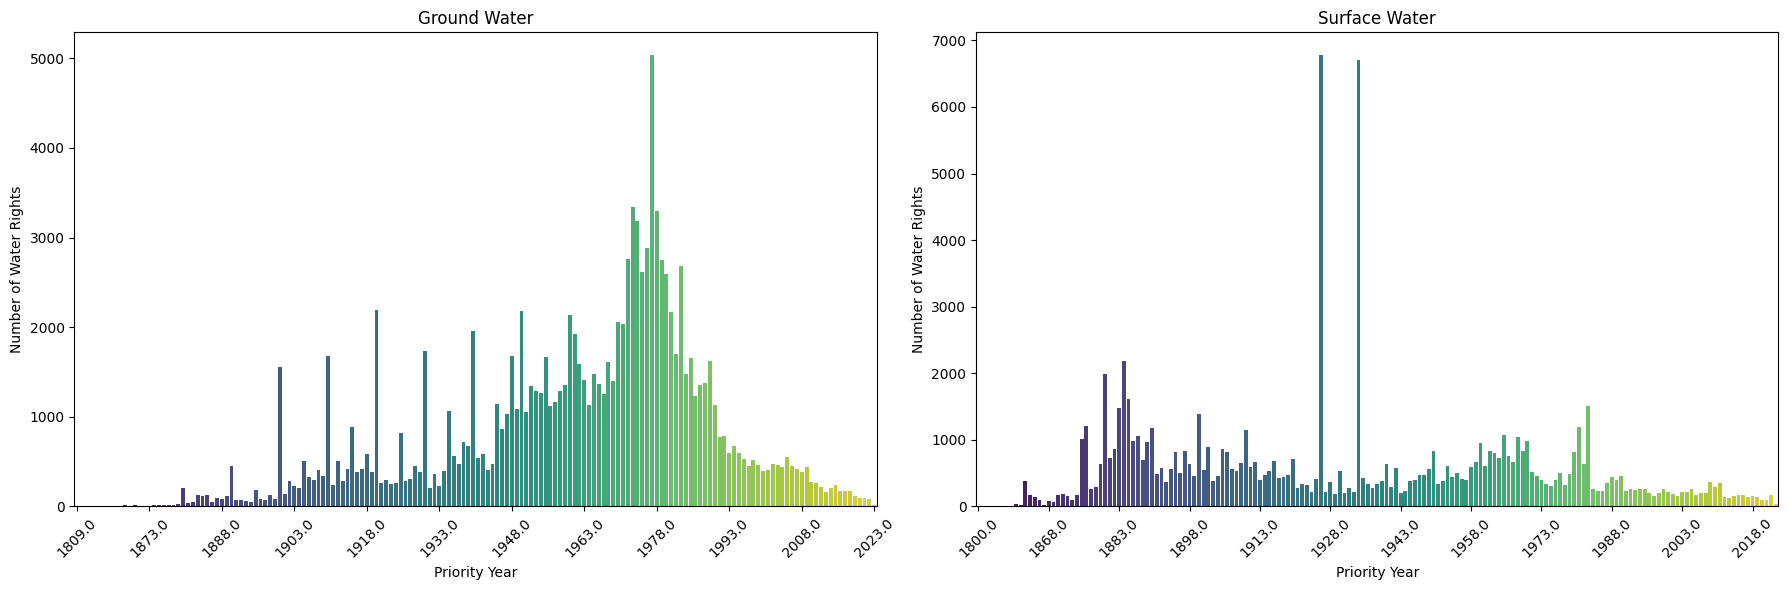

In [ ]:
# ----------------------------------- #
#   Figure for All of TV (SW/GW)
#         (priority year)
# ----------------------------------- #
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data['PriorityDa'] = pd.to_datetime(data['PriorityDa'], errors='coerce')
data['PriorityYear'] = data['PriorityDa'].dt.year


groundwater_data = data[data['Source'] == 'GROUND WATER']
other_data = data[data['Source'] != 'GROUND WATER']

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for GW
sns.countplot(x='PriorityYear', data=groundwater_data, palette='viridis', ax=axes[0])
axes[0].set_title('Ground Water')
axes[0].set_xlabel('Priority Year')
axes[0].set_ylabel('Number of Water Rights')
axes[0].xaxis.set_major_locator(plt.MaxNLocator(15))  # Adjust the number within MaxNLocator
axes[0].tick_params(axis='x', rotation=45)

# Plot for SW
sns.countplot(x='PriorityYear', data=other_data, palette='viridis', ax=axes[1])
axes[1].set_title('Surface Water')
axes[1].set_xlabel('Priority Year')
axes[1].set_ylabel('Number of Water Rights')
axes[1].xaxis.set_major_locator(plt.MaxNLocator(15))  # Adjust the number within MaxNLocator
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-8-31fe1757eaff>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DecreedYear', data=groundwater_data, palette='viridis', ax=axes[0])
<ipython-input-8-31fe1757eaff>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DecreedYear', data=other_data, palette='viridis', ax=axes[1])


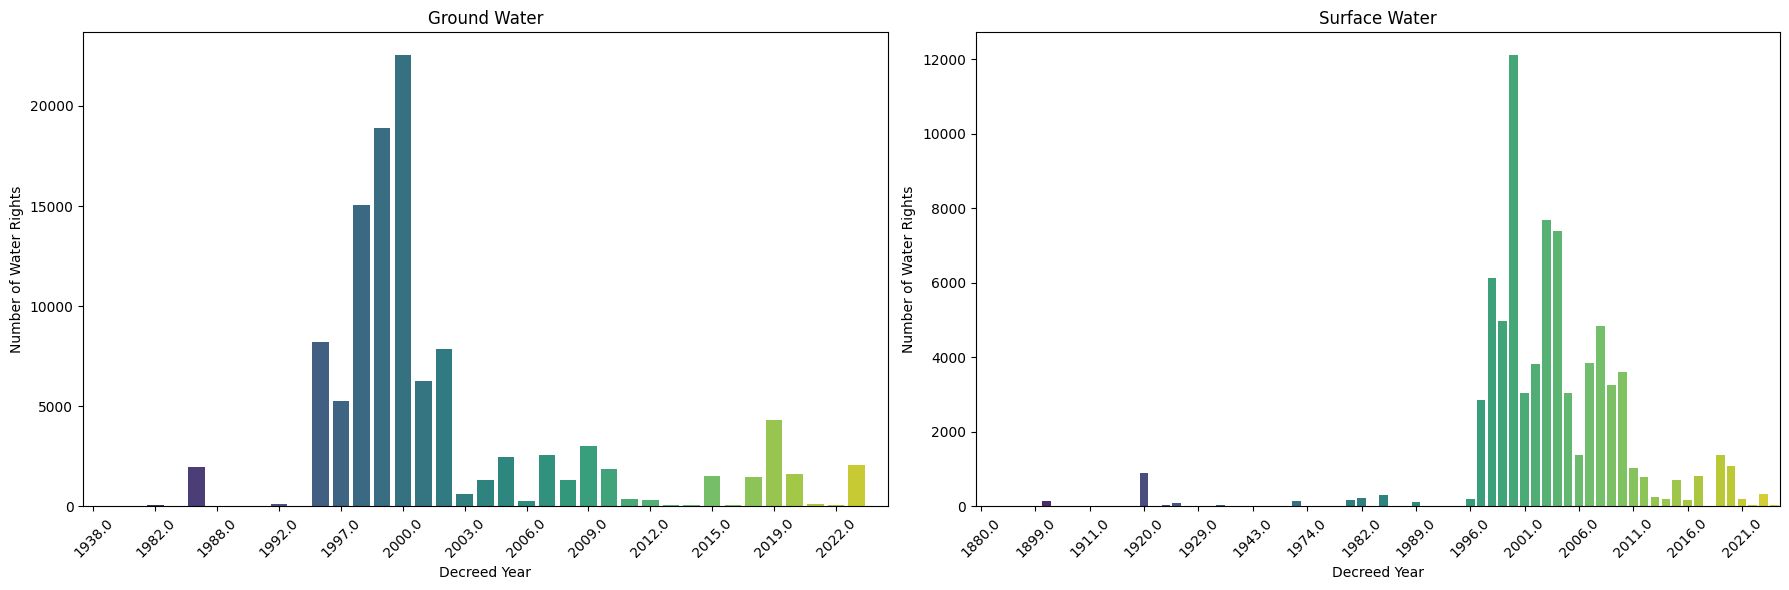

In [8]:
# ----------------------------------- #
#   Figure for All of TV (SW/GW)
#         (decreed year)
# ----------------------------------- #
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data['DecreedDat'] = pd.to_datetime(data['DecreedDat'], errors='coerce')
data['DecreedYear'] = data['DecreedDat'].dt.year


groundwater_data = data[data['Source'] == 'GROUND WATER']
other_data = data[data['Source'] != 'GROUND WATER']

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for GW
sns.countplot(x='DecreedYear', data=groundwater_data, palette='viridis', ax=axes[0])
axes[0].set_title('Ground Water')
axes[0].set_xlabel('Decreed Year')
axes[0].set_ylabel('Number of Water Rights')
axes[0].xaxis.set_major_locator(plt.MaxNLocator(15))  # Adjust the number within MaxNLocator
axes[0].tick_params(axis='x', rotation=45)

# Plot for SW
sns.countplot(x='DecreedYear', data=other_data, palette='viridis', ax=axes[1])
axes[1].set_title('Surface Water')
axes[1].set_xlabel('Decreed Year')
axes[1].set_ylabel('Number of Water Rights')
axes[1].xaxis.set_major_locator(plt.MaxNLocator(15))  # Adjust the number within MaxNLocator
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

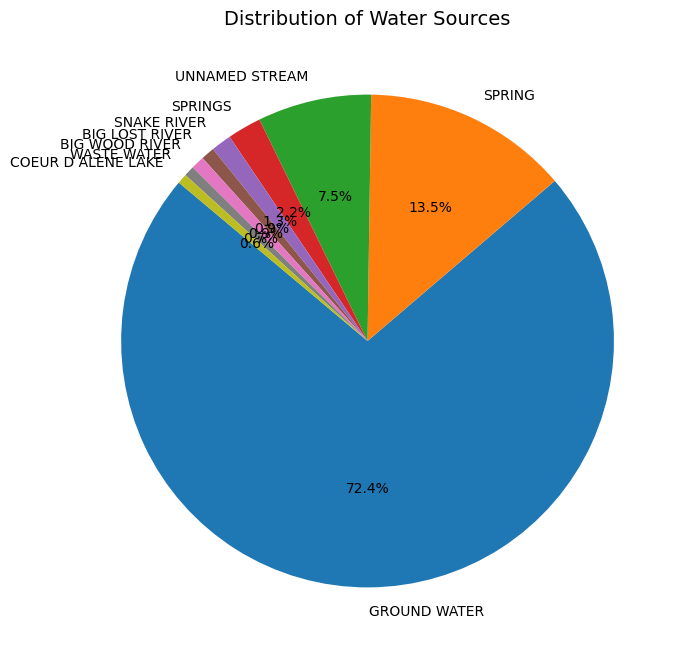

In [ ]:
# ----------------------------------- #
#   Water Sources in the LBRB (pie)   #
# ----------------------------------- #

data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')

data['Source'] = data['Source'].astype(str)

counts = data['Source'].value_counts()
total_count = counts.sum()
filtered_counts = counts[counts / total_count >= 0.005]

plt.figure(figsize=(8, 8))
plt.pie(filtered_counts, labels=filtered_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Water Sources', fontsize=14)
plt.setp(plt.gca().texts, fontsize=10)  # Adjust text size as needed
plt.show()

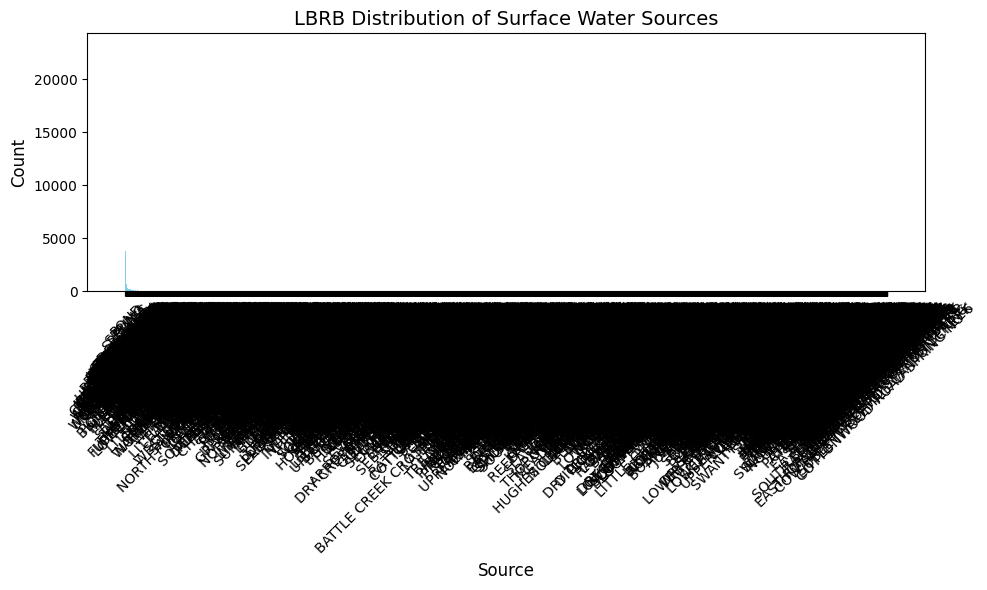

In [ ]:
# ----------------------------------- #
#   Water Sources in the LBRB (bar)
#              excluding GW
# ----------------------------------- #
data = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/lbrb_water_rights.csv')
data['Source'] = data['Source'].astype(str)

# Filter out 'GROUND WATER' entries
filtered_data = data[data['Source'] != 'GROUND WATER']

# Count occurrences of each source, excluding 'GROUND WATER'
counts = filtered_data['Source'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts, color='skyblue')
plt.title('LBRB Distribution of Surface Water Sources', fontsize=14)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

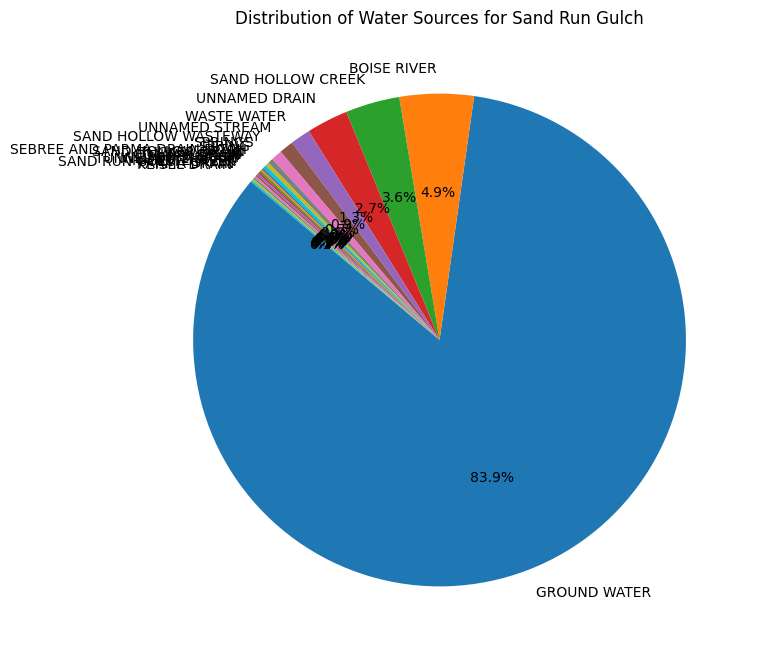

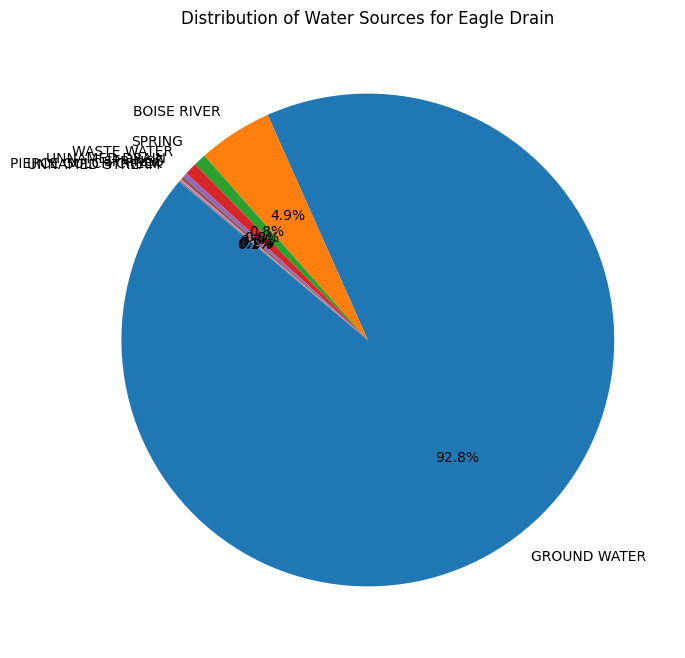

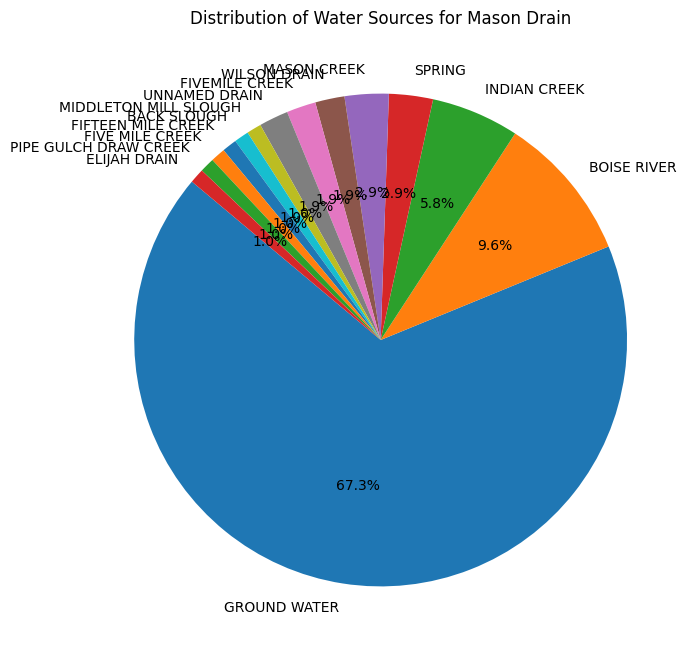

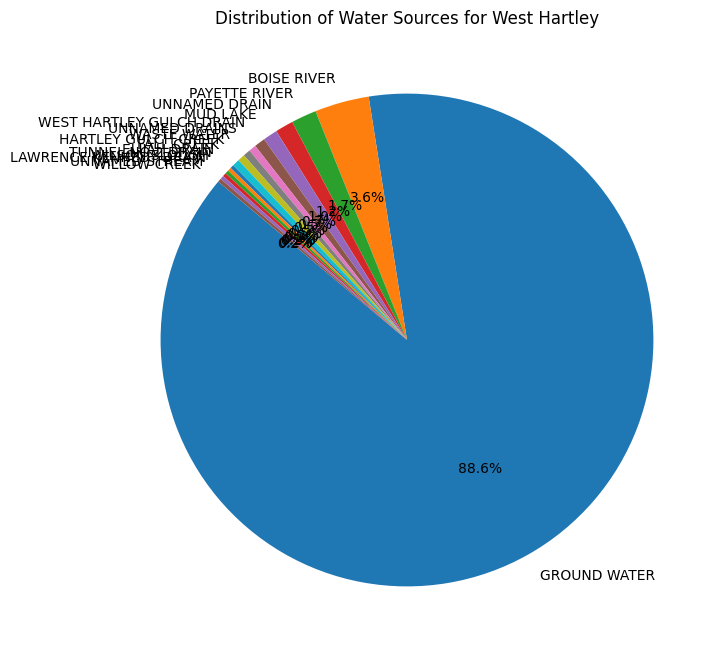

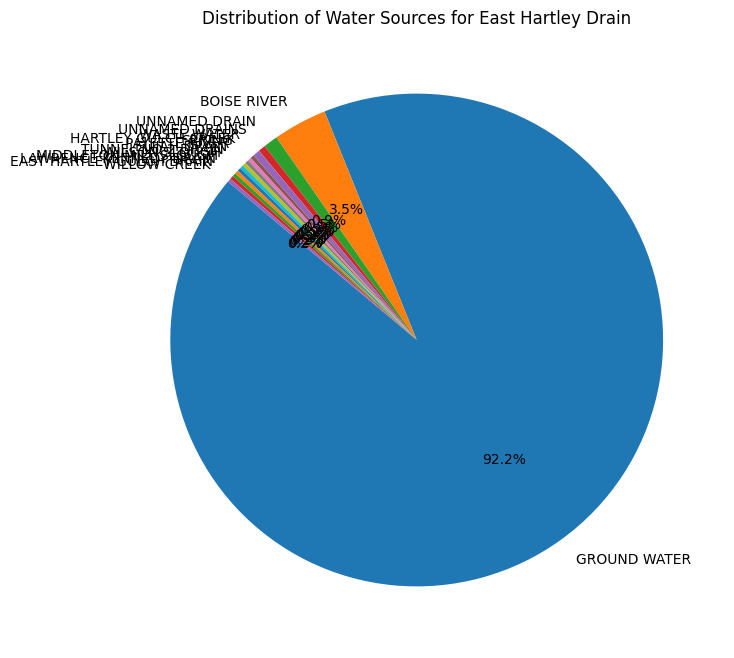

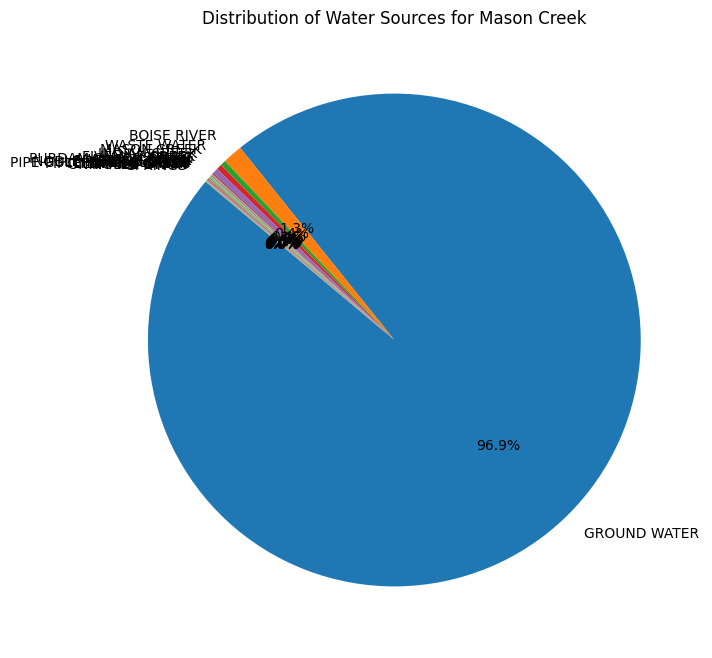

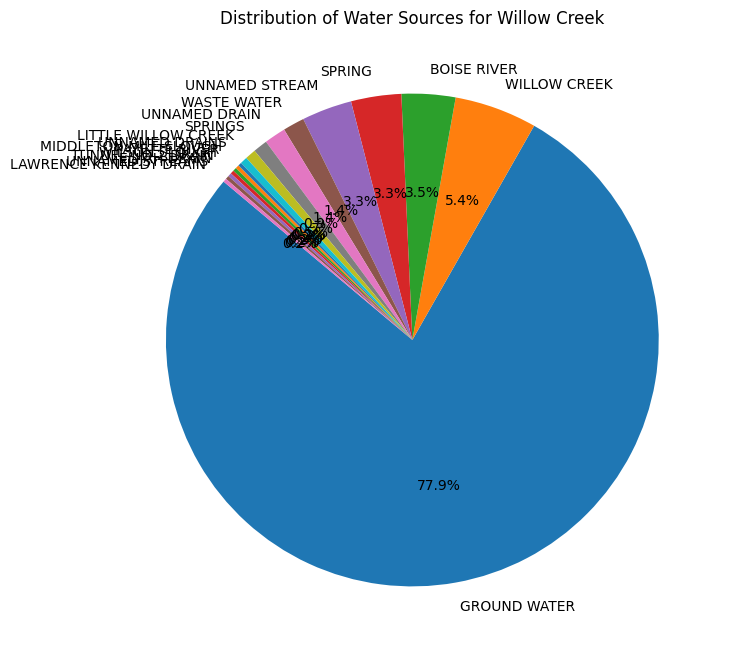

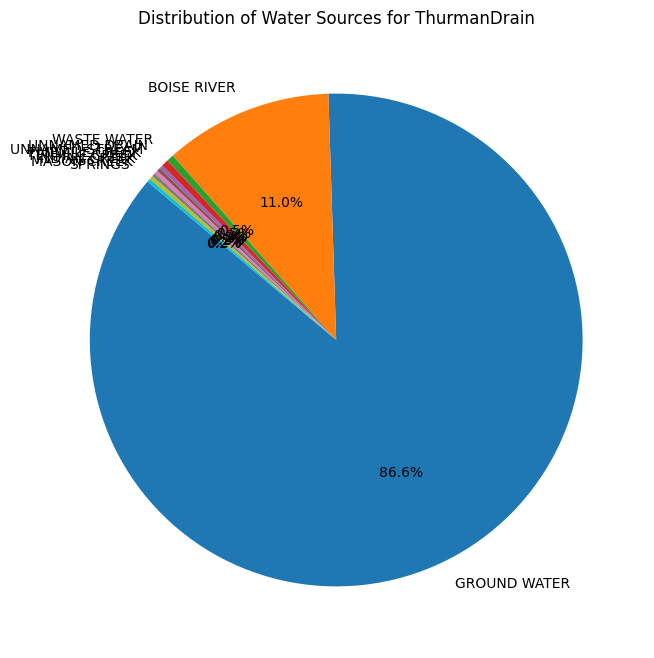

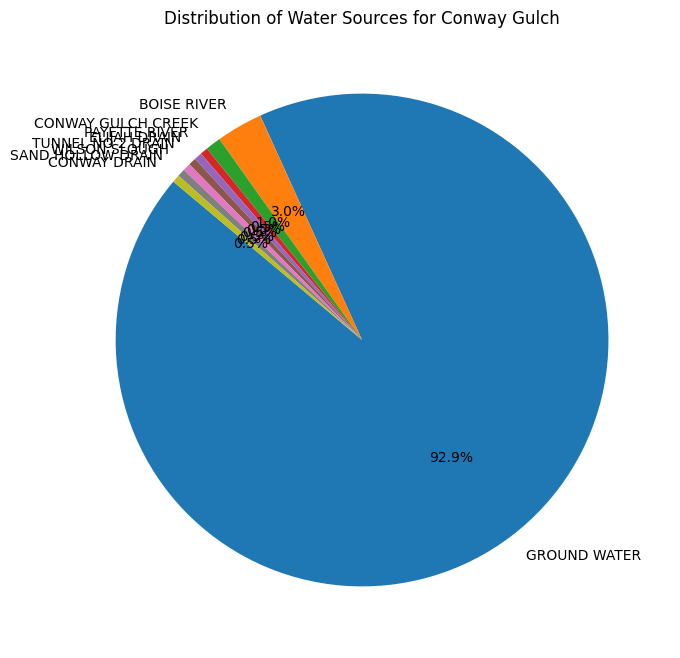

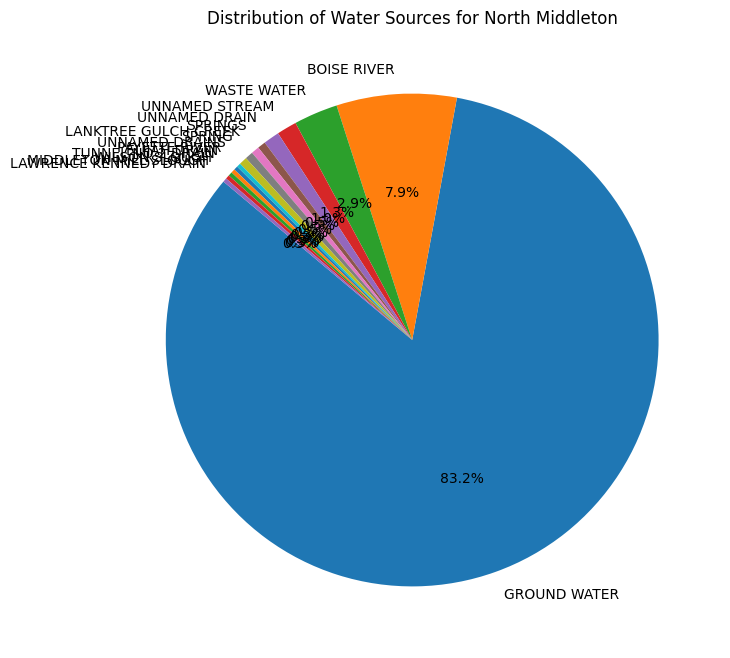

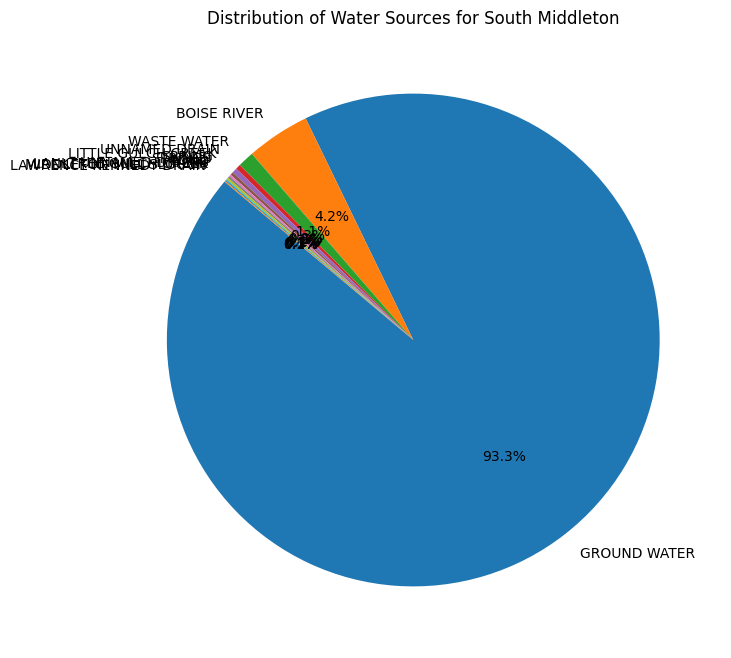

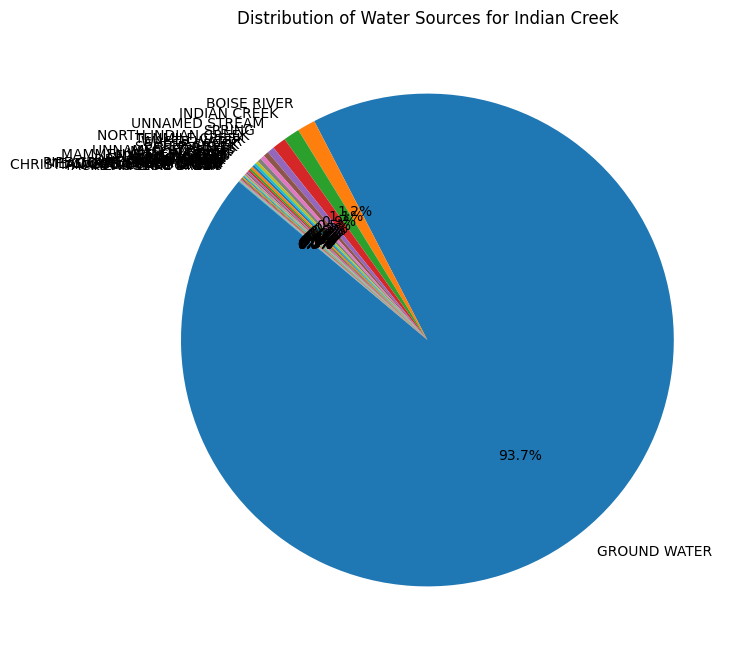

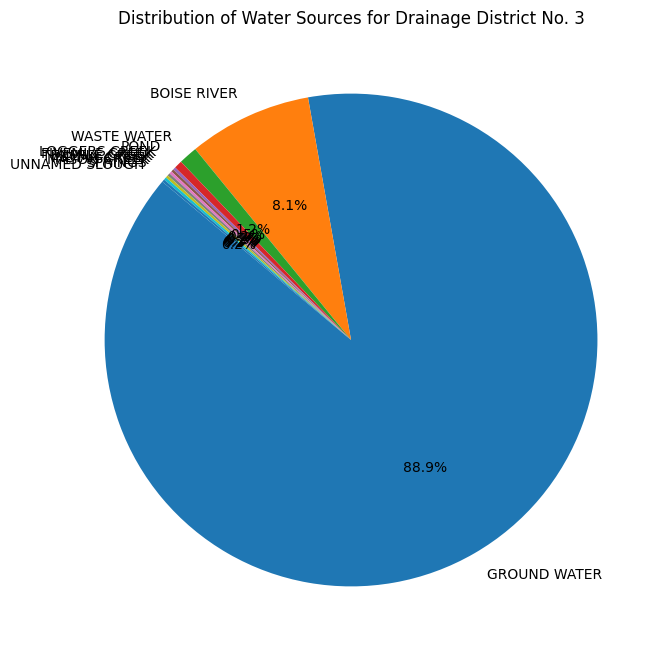

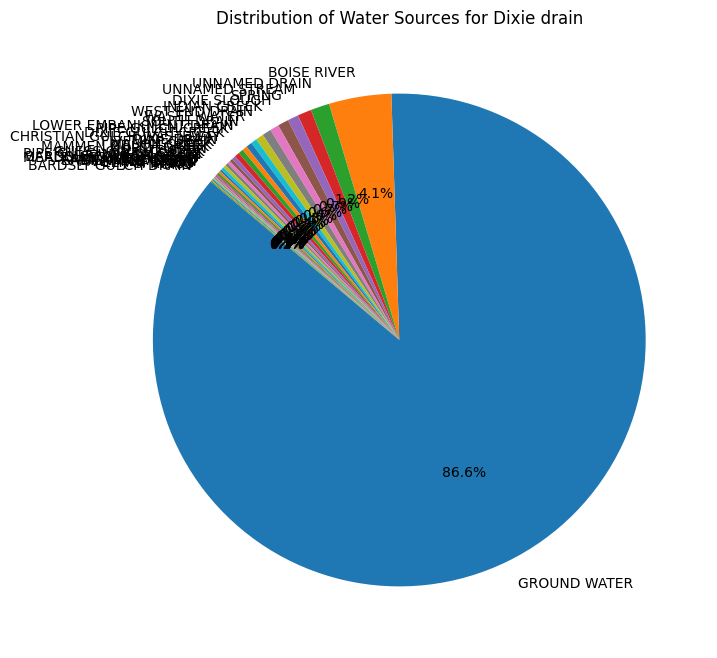

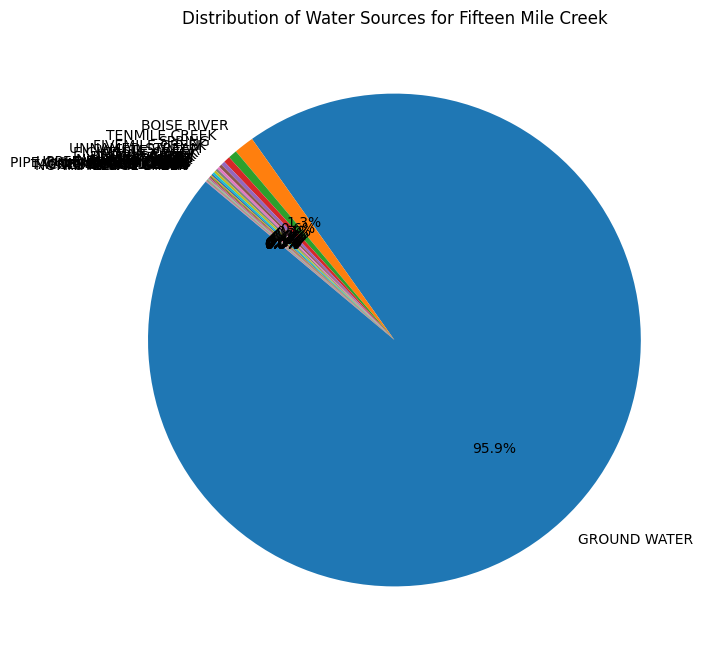

In [14]:
# ----------------------------------- #
#  Water Sources for each Drainshed   #
# ----------------------------------- #

file = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_rights/wr_drainshed_masked/drainsheds_wr.csv')

drainsheds = file['Drainshed'].unique()

for drainshed in drainsheds:
    drainshed_data = file[file['Drainshed'] == drainshed]

    source_counts = drainshed_data['Source'].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=140)

    plt.title(f'Distribution of Water Sources for {drainshed}')

    plt.show()